# Introduction to scikit-learn
1.Getting our data ready for machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = heart_disease.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
# spliting the data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [8]:
X = car_sales.drop("Price",axis=1)
Y = car_sales["Price"]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [9]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
x.head()

In [ ]:
# turning catogories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features,)],
                                   remainder="passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x

In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
transformed_x,len(transformed_x)

In [ ]:
y = car_sales["Price"]
y

In [ ]:
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(transformed_x,
                                                      y,
                                                      test_size = 0.2)
model.fit(x_train,y_train)


In [ ]:
model.score(x_test,y_test)

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

In [ ]:
car_sales_missing.head(10)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]

In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features,)],
                                   remainder="passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x

In [ ]:
X.isna().sum()

In [ ]:
# placing another value in missing places
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)


In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# remove the missing values
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]

In [ ]:
X

In [ ]:
Y

In [ ]:
car_sales_missing2 = car_sales_missing.drop("Price",axis=1)
car_sales_missing2

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features,)],
                                   remainder="passthrough")
transformed_x_missing = transformer.fit_transform(car_sales_missing2)
transformed_x_missing

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(transformed_x_missing,
                                                      Y,
                                                      test_size = 0.2)
model.fit(x_train,y_train)

In [11]:
model.score(x_test,y_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

# Filling missing values with scikit-learn

In [ ]:

car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [12]:
car_sales_missing

NameError: name 'car_sales_missing' is not defined

In [13]:
car_sales_missing.isna().sum()

NameError: name 'car_sales_missing' is not defined

In [14]:
car_sales_missing = car_sales_missing.dropna(subset=["Price"])
car_sales_missing.isna().sum()

NameError: name 'car_sales_missing' is not defined

In [15]:
car_sales_missing

NameError: name 'car_sales_missing' is not defined

In [16]:
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]
X

NameError: name 'car_sales_missing' is not defined

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

filled_x = imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4, 35431.0],
       ['BMW', 'Blue', 5, 192714.0],
       ['Honda', 'White', 4, 84714.0],
       ...,
       ['Nissan', 'Blue', 4, 66604.0],
       ['Honda', 'White', 4, 215883.0],
       ['Toyota', 'Blue', 4, 248360.0]], dtype=object)

In [18]:
car_sales_filled = pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431.0
1,BMW,Blue,5,192714.0
2,Honda,White,4,84714.0
3,Toyota,White,4,154365.0
4,Nissan,Blue,3,181577.0
...,...,...,...,...
995,Toyota,Black,4,35820.0
996,Nissan,White,3,155144.0
997,Nissan,Blue,4,66604.0
998,Honda,White,4,215883.0


In [19]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features,)],
                                   remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

In [21]:
Y = Y.fillna(Y.mean())
Y.isna().sum()

0

In [22]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(transformed_x,
                                                Y,
                                                test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.3235867221569877

In [23]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [24]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [25]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [26]:
X = housing_df.drop("target",axis=1)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [27]:
Y = housing_df["target"]
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [29]:
len(x_train),len(y_train),len(x_test),len(y_test)

(16512, 16512, 4128, 4128)

In [30]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [31]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [32]:
from sklearn.ensemble  import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
model.score(x_train,y_train)

0.9736801960414609

In [34]:
model.score(x_test,y_test)

0.8065734772187598

In [35]:
# ridge model
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5758549611440127

In [36]:
# lasso model
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.2841671821008396

In [37]:
#classification datasets
from sklearn.datasets import load_iris
ds = load_iris()
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [38]:
ds_df = pd.DataFrame(ds["data"],columns=ds["feature_names"])
ds_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
ds_df["target"] = ds["target"]
ds_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
x = ds_df.drop("target",axis=1)
y = ds_df["target"]
x,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
len(x_train),len(x_test),len(y_train),len(y_test)

(120, 30, 120, 30)

In [42]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log_loss")
model.fit(x_train,y_train)

SGDClassifier(loss='log_loss')

In [43]:
model.score(x_test,y_test)

0.9666666666666667

In [44]:
y_preds = model.predict(x_test)

In [45]:
y_preds

array([1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 0, 1])

In [46]:
np.array(y_test)

array([1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 0, 1])

In [47]:
np.mean(y_preds == y_test)

0.9666666666666667

In [48]:
model.score(x_test,y_test)

0.9666666666666667

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.9666666666666667

In [50]:
model.predict_proba(x_test)

array([[2.21356646e-080, 1.00000000e+000, 1.10016175e-031],
       [4.32638459e-126, 5.00000000e-001, 5.00000000e-001],
       [9.99999971e-001, 2.92323291e-008, 1.69635590e-278],
       [1.00000000e+000, 2.34876897e-015, 0.00000000e+000],
       [1.19232250e-106, 2.27898007e-006, 9.99997721e-001],
       [3.58499461e-067, 1.00000000e+000, 1.13782435e-073],
       [9.99962293e-001, 3.77068900e-005, 1.23663860e-280],
       [1.00000000e+000, 5.64233574e-013, 2.99091752e-289],
       [8.48017369e-085, 1.03141015e-026, 1.00000000e+000],
       [5.09779291e-001, 4.90220709e-001, 3.91640784e-299],
       [1.00000000e+000, 1.20466077e-017, 0.00000000e+000],
       [1.30220994e-052, 1.00000000e+000, 1.09513390e-041],
       [5.53308010e-063, 1.00000000e+000, 1.41392539e-071],
       [1.00000000e+000, 6.66652913e-017, 1.52985117e-292],
       [9.98524486e-001, 1.47551356e-003, 4.57758410e-267],
       [1.00000000e+000, 1.31512023e-023, 0.00000000e+000],
       [2.34984593e-118, 7.90016334e-013

In [51]:
hd_df = pd.read_csv("heart-disease.csv")
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
x = hd_df.drop("target",axis=1)
y = hd_df["target"]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [54]:
model.score(x_test,y_test)

0.8524590163934426

In [55]:
model.score(x_train,y_train)

1.0

In [56]:
cross_val_score(model,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [57]:
heart_diseases = pd.read_csv("heart-disease.csv")
heart_diseases

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_diseases.drop("target",axis=1)
y = heart_diseases["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

# cross_val_score(clf, x, y)
cross_val = cross_val_score(clf, x, y, cv=5)

In [59]:
np.mean(cross_val)

0.8215300546448088

In [60]:
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8360655737704918

In [61]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.25, 0.75],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.51, 0.49]])

In [62]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.06, 0.58, 0.49, 0.11, 0.77, 0.84, 0.75, 0.04, 0.02, 0.49, 0.82,
       0.24, 0.93, 0.12, 0.96, 0.99, 1.  , 0.17, 0.01, 0.06, 0.61, 0.11,
       0.67, 0.79, 0.67, 0.64, 0.7 , 0.76, 0.2 , 0.85, 0.08, 0.11, 0.01,
       0.26, 0.53, 0.19, 0.54, 0.68, 0.56, 0.85, 0.76, 0.77, 0.86, 0.66,
       0.71, 0.33, 0.57, 0.99, 0.11, 0.05, 0.21, 0.24, 0.86, 0.75, 0.16,
       0.1 , 0.42, 0.94, 0.13, 0.  , 0.23])

In [63]:
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.17241379,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.27586207,
       0.55172414, 0.68965517, 0.72413793, 0.72413793, 0.79310345,
       0.89655172, 0.96551724, 1.        ])

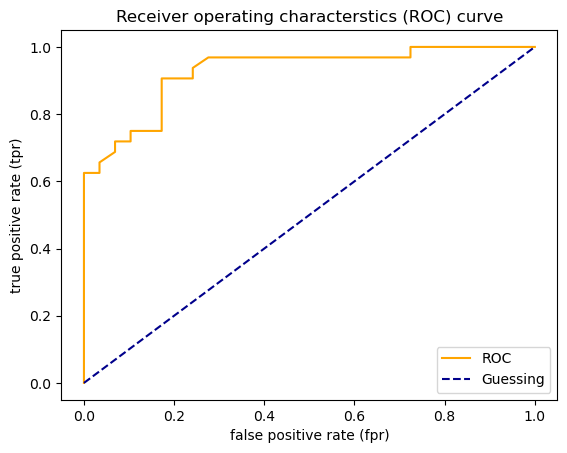

In [64]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")

    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Receiver operating characterstics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [65]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9267241379310345

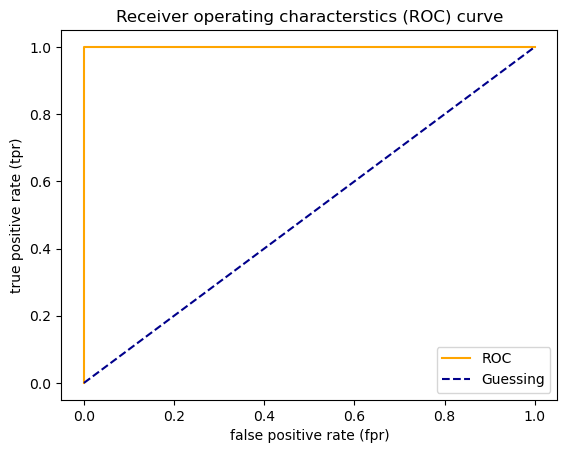

In [66]:
fpr, tpr, tresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [67]:
roc_auc_score(y_test,y_test)

1.0

In [68]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [69]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


In [70]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



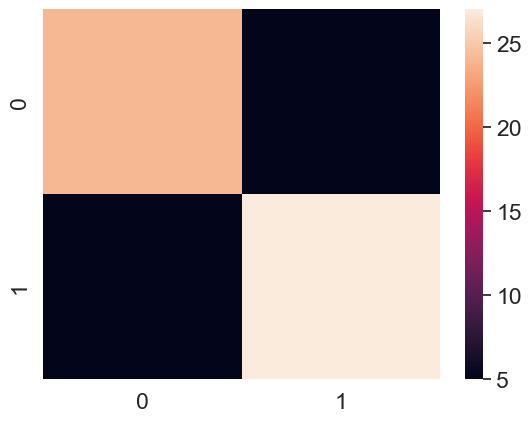

In [71]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat)

plt.show()

In [72]:
import sklearn 
sklearn.__version__

'1.5.1'

In [73]:
clf

RandomForestClassifier()

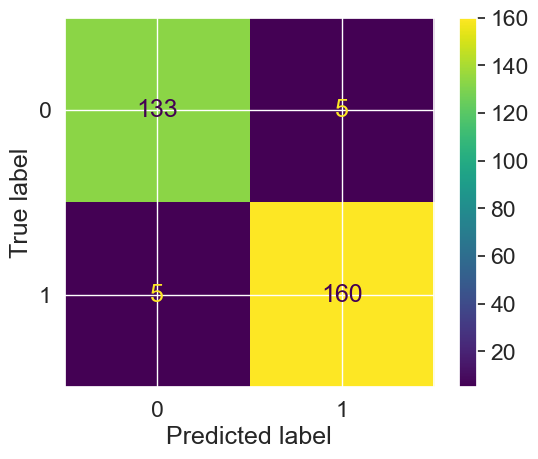

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)
plt.show()

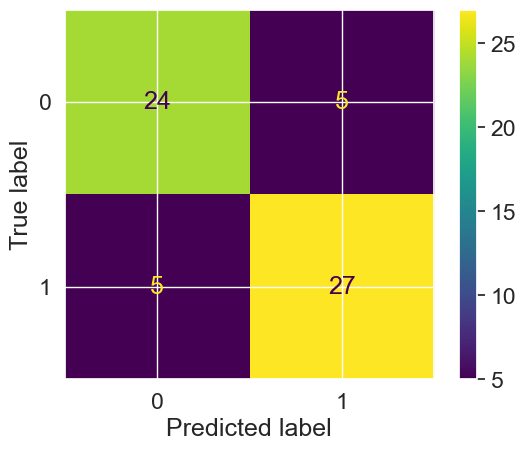

In [75]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)
plt.show()

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [77]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
model.score(x_test,y_test)

0.8065734772187598

In [79]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test),y_test.mean())

In [80]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [81]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [82]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [83]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [84]:
df["differences"].mean()

0.012048392126937589

In [85]:
np.abs(df["differences"]).mean()

0.32659871732073664

In [86]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [87]:
df["squared differences"] = np.square(df["differences"])
df.head(10)

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.652530,0.065530,0.004294
7113,1.98200,2.343230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


In [88]:
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [89]:
add_square = df["squared differences"].mean()
add_square

0.2534678520824551